In [2]:
from cloudvolume import CloudVolume
import numpy as np

seg = CloudVolume("s3://bossdb-open-data/iarpa_microns/minnie/minnie65/seg", use_https=True, parallel=True, mip=0)
seg0 = CloudVolume("s3://bossdb-open-data/iarpa_microns/minnie/minnie65/seg", use_https=True, parallel=True, mip=(8,8,40))
seg1 = CloudVolume("s3://bossdb-open-data/iarpa_microns/minnie/minnie65/seg", use_https=True, parallel=True, mip=(16,16,40))
seg2 = CloudVolume("s3://bossdb-open-data/iarpa_microns/minnie/minnie65/seg", use_https=True, parallel=True, mip=(32,32,40))


In [5]:
endpoint = (107820, 233757, 21960)
# starting_point = (107620, 233557, 21950)
import numpy as np
def get_bounds(endpoint, radius, mult=1):
    bound  = (endpoint[0] - int(mult*radius[0]), 
            endpoint[0] + int(mult*radius[0]),
            endpoint[1] - int(mult*radius[1]),
            endpoint[1] + int(mult*radius[1]),
            endpoint[2] - radius[2],
            endpoint[2] + radius[2])
    return bound
b0 = get_bounds(np.divide(endpoint, np.array([2,2,1])), (100,100,10)) # 8 8 40 
b1 = get_bounds(np.divide(endpoint, np.array([4,4,1])), (50,50,10))
b2 = get_bounds(np.divide(endpoint, np.array([8,8,1])), (25,25,10))
s0 = seg0[b0[0]:b0[1], b0[2]:b0[3], b0[4]:b0[5]]
s1 = seg1[b1[0]:b1[1], b1[2]:b1[3], b1[4]:b1[5]]
s2 = seg2[b2[0]:b2[1], b2[2]:b2[3], b2[4]:b2[5]]
s0 = np.squeeze(s0)
s0_1 = np.array([s0==864691133497316692])


Decompressing: 100%|██████████| 4/4 [00:00<00:00, 1655.05it/s]


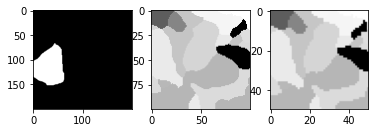

In [17]:
s0_1 = np.array([s0==864691135177057614])


import matplotlib.pyplot as plt
from scipy import ndimage

fig,ax=plt.subplots(1,3)
s0_slice = s0_1[0, :, :, 9]
s1_slice = s1[:, :, 0]
s2_slice = s2[:, :, 0]


ax[0].imshow(s0_slice, cmap='gray')
ax[1].imshow(s1_slice, cmap='gray') # vmin=np.min(s1_slice[s1_slice > 0])
ax[2].imshow(s2_slice, cmap='gray', vmin=np.min(s2_slice[s2_slice > 0]))
plt.show()

[100.0, 100.0, 10.0]

In [3]:
seg.bounds

Bbox([26385, 30308, 14850],[218809, 161359, 27858], dtype=int32)

In [6]:
np.divide(endpoint, np.array([2,2,1]))

array([ 53910. , 116878.5,  21960. ])

In [7]:
b0 = get_bounds(np.divide(endpoint, np.array([2,2,1])), (100,100,10))

In [10]:
b0

(53810.0, 54010.0, 116778.5, 116978.5, 21950.0, 21970.0)